In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy as sp
from scipy import stats

In [262]:
ratings = pd.read_csv('anime_ratings.csv')
ratings.head(10)

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic
0,Attack on Titan,2013,94,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,10.0,9.0,9.50,#9.9,False,seinen
1,A Silent Voice,2017,1,"Romance,Realism",10.0,10.0,9.0,9.0,10.0,10.0,9.67,#9.9,True,shonen
2,Made in Abyss,2017,26,"Adventure,Dark Fantasy",9.0,10.0,9.0,10.0,10.0,10.0,9.67,#9.7,False,seinen
3,Love is War,2019,37,"Comedy,Slice of life",8.0,8.0,9.0,9.0,9.0,8.0,8.50,#9.5,False,shonen
4,Death Note,2006,37,"Drama,Realism",10.0,10.0,NaN,8.0,9.0,8.0,7.50,#9.5,False,seinen
5,Full Metal Alchemist: Brotherhood,2009,64,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,9.0,8.0,9.17,#9.7,False,shonen
6,Avatar: The Last Airbender,2005,61,"Adventure,Fantasy",9.0,10.0,8.0,10.0,8.0,8.0,8.83,#9.6,False,shonen
7,Princess Mononoke,1999,1,"Drama,Fantasy",9.0,10.0,8.0,10.0,8.0,8.0,8.83,#9.4,True,seinen
8,Naruto,2005,720,"Action,Fantasy",NaN,8.0,8.0,9.0,8.0,8.0,6.83,#8.6,False,shonen
9,Mushoku Tensei,2022,48,"Adventure,Isekai",9.0,10.0,9.0,8.0,10.0,NaN,7.67,#9.6,False,seinen


In [263]:
ratings.dtypes

Title                     object
Release Year               int64
Episodes                   int64
Genre                     object
Story                    float64
Character Development    float64
Art                      float64
World Building           float64
Emotion                  float64
Music                    float64
Cumulative Rating        float64
Personal Rating           object
Movie                       bool
Demographic               object
dtype: object

In [264]:
ratings['Personal Rating'] = ratings['Personal Rating'].str.replace('#', '').astype(float)

In [265]:
ratings.dtypes

Title                     object
Release Year               int64
Episodes                   int64
Genre                     object
Story                    float64
Character Development    float64
Art                      float64
World Building           float64
Emotion                  float64
Music                    float64
Cumulative Rating        float64
Personal Rating          float64
Movie                       bool
Demographic               object
dtype: object

In [266]:
ratings.head()

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic
0,Attack on Titan,2013,94,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,10.0,9.0,9.50,9.9,False,seinen
1,A Silent Voice,2017,1,"Romance,Realism",10.0,10.0,9.0,9.0,10.0,10.0,9.67,9.9,True,shonen
2,Made in Abyss,2017,26,"Adventure,Dark Fantasy",9.0,10.0,9.0,10.0,10.0,10.0,9.67,9.7,False,seinen
3,Love is War,2019,37,"Comedy,Slice of life",8.0,8.0,9.0,9.0,9.0,8.0,8.50,9.5,False,shonen
4,Death Note,2006,37,"Drama,Realism",10.0,10.0,NaN,8.0,9.0,8.0,7.50,9.5,False,seinen


In [267]:
#Calculating most common number
selected_columns = ['Story','Character Development','Art','World Building','Emotion','Music']
flat_series = ratings[selected_columns].stack().reset_index(drop=True)
most_common_counts = flat_series.value_counts()
most_common_number = most_common_counts.index[0]
print(most_common_number)

8.0


In [268]:
#Calculating mean rating number
columns_mean_total = 0
for columns in selected_columns:
    column_mean = ratings[column].mean()
    columns_mean_total += column_mean
rating_columns_mean = columns_mean_total/len(selected_columns)
print(rating_columns_mean.round())

7.0


In [269]:
ratings = ratings.fillna(7)

In [270]:
ratings.head()

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic
0,Attack on Titan,2013,94,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,10.0,9.0,9.50,9.9,False,seinen
1,A Silent Voice,2017,1,"Romance,Realism",10.0,10.0,9.0,9.0,10.0,10.0,9.67,9.9,True,shonen
2,Made in Abyss,2017,26,"Adventure,Dark Fantasy",9.0,10.0,9.0,10.0,10.0,10.0,9.67,9.7,False,seinen
3,Love is War,2019,37,"Comedy,Slice of life",8.0,8.0,9.0,9.0,9.0,8.0,8.50,9.5,False,shonen
4,Death Note,2006,37,"Drama,Realism",10.0,10.0,7.0,8.0,9.0,8.0,7.50,9.5,False,seinen


In [271]:
ratings['Cumulative Rating'] = ratings[selected_columns].sum(axis=1)
ratings['Cumulative Rating'] = ratings['Cumulative Rating']/6
#Another way to do it:
#ratings['Cumulative Rating'] = (ratings['Story'] + ratings['Character Development'] + ratings['Art'] + ratings['World Building'] + ratings['Emotion'] + ratings['Music']) / 6
ratings['Cumulative Rating'] = ratings['Cumulative Rating'].round(2)

In [272]:
ratings.head(10)

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic
0,Attack on Titan,2013,94,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,10.0,9.0,9.50,9.9,False,seinen
1,A Silent Voice,2017,1,"Romance,Realism",10.0,10.0,9.0,9.0,10.0,10.0,9.67,9.9,True,shonen
2,Made in Abyss,2017,26,"Adventure,Dark Fantasy",9.0,10.0,9.0,10.0,10.0,10.0,9.67,9.7,False,seinen
3,Love is War,2019,37,"Comedy,Slice of life",8.0,8.0,9.0,9.0,9.0,8.0,8.50,9.5,False,shonen
4,Death Note,2006,37,"Drama,Realism",10.0,10.0,7.0,8.0,9.0,8.0,8.67,9.5,False,seinen
5,Full Metal Alchemist: Brotherhood,2009,64,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,9.0,8.0,9.17,9.7,False,shonen
6,Avatar: The Last Airbender,2005,61,"Adventure,Fantasy",9.0,10.0,8.0,10.0,8.0,8.0,8.83,9.6,False,shonen
7,Princess Mononoke,1999,1,"Drama,Fantasy",9.0,10.0,8.0,10.0,8.0,8.0,8.83,9.4,True,seinen
8,Naruto,2005,720,"Action,Fantasy",7.0,8.0,8.0,9.0,8.0,8.0,8.00,8.6,False,shonen
9,Mushoku Tensei,2022,48,"Adventure,Isekai",9.0,10.0,9.0,8.0,10.0,7.0,8.83,9.6,False,seinen


In [273]:
decades = []
for year in ratings['Release Year']:
    if year >= 2020:
        decades.append('2020s')
    elif year >= 2010:
        decades.append('2010s')
    elif year >= 2000:
        decades.append('2000s')
    else:
        decades.append('1900s')
        
ratings['Decade'] = decades

In [274]:
ratings.head()

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic,Decade
0,Attack on Titan,2013,94,"Action,Dark Fantasy",10.0,10.0,8.0,10.0,10.0,9.0,9.50,9.9,False,seinen,2010s
1,A Silent Voice,2017,1,"Romance,Realism",10.0,10.0,9.0,9.0,10.0,10.0,9.67,9.9,True,shonen,2010s
2,Made in Abyss,2017,26,"Adventure,Dark Fantasy",9.0,10.0,9.0,10.0,10.0,10.0,9.67,9.7,False,seinen,2010s
3,Love is War,2019,37,"Comedy,Slice of life",8.0,8.0,9.0,9.0,9.0,8.0,8.50,9.5,False,shonen,2010s
4,Death Note,2006,37,"Drama,Realism",10.0,10.0,7.0,8.0,9.0,8.0,8.67,9.5,False,seinen,2000s


In [275]:
ratings[['Genre','Subgenre']] = ratings['Genre'].str.split(',', expand=True)

In [276]:
ratings.head()

,Title,Release Year,Episodes,Genre,Story,Character Development,Art,World Building,Emotion,Music,Cumulative Rating,Personal Rating,Movie,Demographic,Decade,Subgenre
0,Attack on Titan,2013,94,Action,10.0,10.0,8.0,10.0,10.0,9.0,9.50,9.9,False,seinen,2010s,Dark Fantasy
1,A Silent Voice,2017,1,Romance,10.0,10.0,9.0,9.0,10.0,10.0,9.67,9.9,True,shonen,2010s,Realism
2,Made in Abyss,2017,26,Adventure,9.0,10.0,9.0,10.0,10.0,10.0,9.67,9.7,False,seinen,2010s,Dark Fantasy
3,Love is War,2019,37,Comedy,8.0,8.0,9.0,9.0,9.0,8.0,8.50,9.5,False,shonen,2010s,Slice of life
4,Death Note,2006,37,Drama,10.0,10.0,7.0,8.0,9.0,8.0,8.67,9.5,False,seinen,2000s,Realism


In [277]:
ratings_grouped = ratings.groupby('Genre').agg({'Story':'mean', 'Character Development':'mean', 'Art':'mean', 'World Building':'mean', 'Emotion':'mean', 'Music':'mean'}).reset_index()

In [278]:
ratings_grouped.head()

,Genre,Story,Character Development,Art,World Building,Emotion,Music
0,Action,6.620690,7.241379,7.482759,6.689655,6.896552,7.275862
1,Adventure,7.454545,7.909091,7.181818,7.636364,7.818182,7.545455
2,Comedy,7.000000,7.000000,7.000000,6.833333,7.666667,7.500000
3,Drama,7.384615,8.384615,7.615385,7.384615,7.923077,7.538462
4,Romance,7.250000,8.000000,7.500000,7.500000,8.250000,8.000000


In [279]:
genre_grouped = ratings.groupby('Genre')['Personal Rating'].mean().reset_index()
genre_std = ratings.groupby('Genre')['Personal Rating'].std().reset_index()

In [280]:
genre_grouped.head()

,Genre,Personal Rating
0,Action,7.044828
1,Adventure,7.845455
2,Comedy,7.500000
3,Drama,8.169231
4,Romance,7.425000


In [281]:
genre_std.head()

,Genre,Personal Rating
0,Action,1.609034
1,Adventure,1.618866
2,Comedy,1.239355
3,Drama,1.586603
4,Romance,1.723127


In [282]:
#Categories rating based on Subgenre data
subratings_grouped = ratings.groupby('Subgenre').agg({'Story':'mean', 'Character Development':'mean', 'Art':'mean', 'World Building':'mean', 'Emotion':'mean', 'Music':'mean'}).reset_index()
#Personal Rating based on Subgenre data
subgenre_grouped = ratings.groupby('Subgenre')['Personal Rating'].mean().reset_index()
subgenre_std = ratings.groupby('Subgenre')['Personal Rating'].std().reset_index()

#Bar Graph Data for Genre & Subgenre
genre_counts = ratings['Genre'].value_counts(ascending=True)
subgenre_counts = ratings['Subgenre'].value_counts(ascending=True)

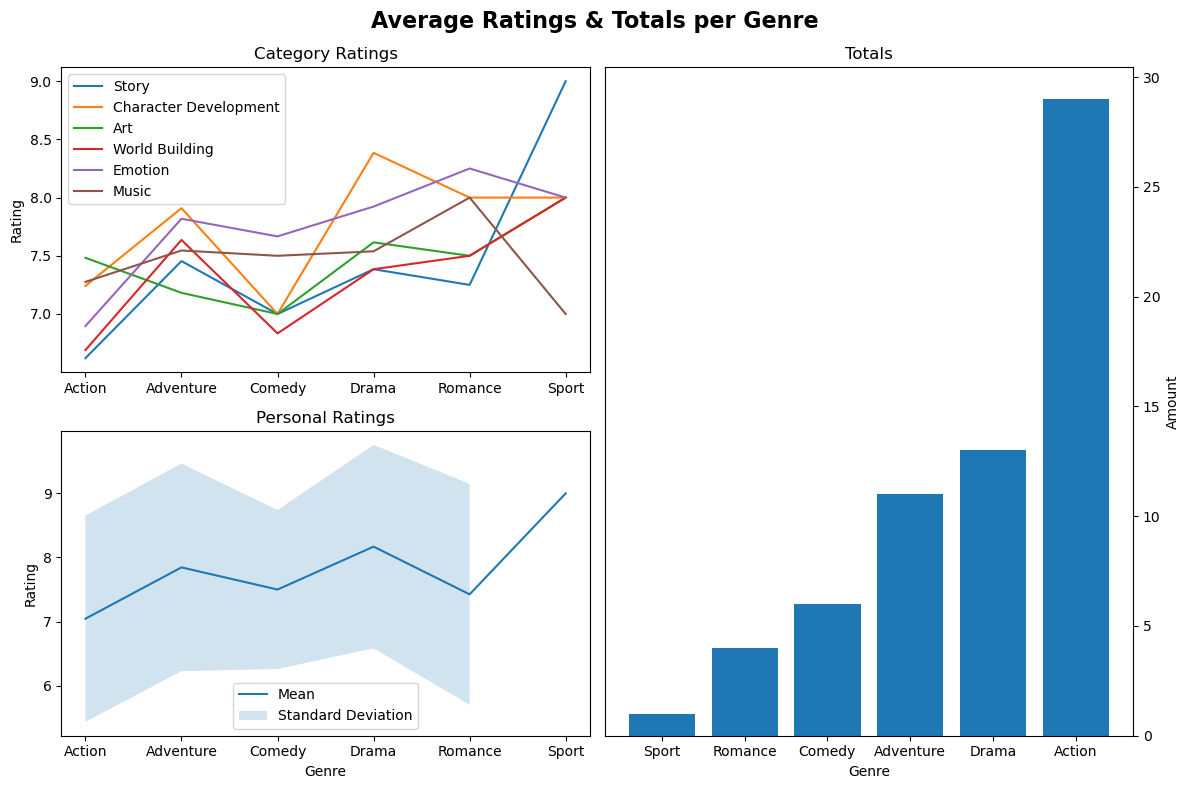

<Figure size 640x480 with 0 Axes>

In [283]:
#Code for subplots of Genre data
fig = plt.figure(figsize=(12,8))

#subplot 1
ax1 = plt.subplot(2,2,1)
columns_to_plot = ['Story', 'Character Development', 'Art', 'World Building', 'Emotion', 'Music']
for column in columns_to_plot:
    ax1.plot(ratings_grouped['Genre'], ratings_grouped[column], label=column)
ax1.set_title('Category Ratings')
#ax1.set_xlabel('Genre')
ax1.set_ylabel('Rating')
ax1.legend()

#subplot 2
ax2 = plt.subplot(2,2,3)
ax2.plot(genre_grouped['Genre'], genre_grouped['Personal Rating'], label='Mean')
ax2.fill_between(genre_grouped['Genre'], genre_grouped['Personal Rating'] - genre_std['Personal Rating'], genre_grouped['Personal Rating'] + genre_std['Personal Rating'], alpha=0.2, label='Standard Deviation')
ax2.set_title('Personal Ratings')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Rating')
ax2.legend()

#subplot 3
ax3 = plt.subplot(1,2,2)
ax3.bar(genre_counts.index, genre_counts.values)
ax3.set_title('Totals')
ax3.set_xlabel('Genre')
ax3.set_ylabel('Amount')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")

fig.suptitle('Average Ratings & Totals per Genre', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
plt.clf()

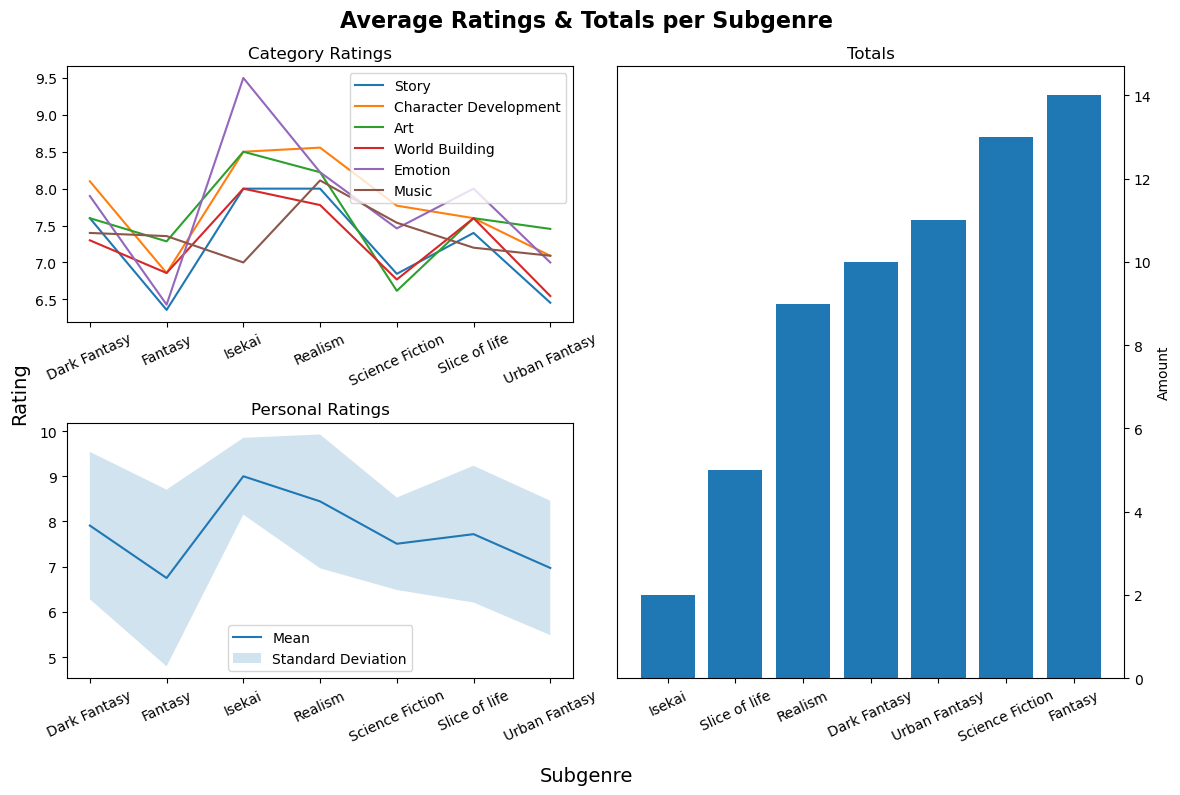

<Figure size 640x480 with 0 Axes>

In [284]:
#Code for subplots of Subgenre data
fig = plt.figure(figsize=(12,8))

#subplot 1
ax1 = plt.subplot(2,2,1)
columns_to_plot = ['Story', 'Character Development', 'Art', 'World Building', 'Emotion', 'Music']
for column in columns_to_plot:
    ax1.plot(subratings_grouped['Subgenre'], subratings_grouped[column], label=column)
ax1.set_title('Category Ratings')
#ax1.set_xlabel('Subgenre')
#ax1.set_ylabel('Rating')
ax1.tick_params(axis='x', labelrotation=25)
ax1.legend(loc='upper right')

#subplot 2
ax2 = plt.subplot(2,2,3)
ax2.plot(subgenre_grouped['Subgenre'], subgenre_grouped['Personal Rating'], label='Mean')
ax2.fill_between(subgenre_grouped['Subgenre'], subgenre_grouped['Personal Rating'] - subgenre_std['Personal Rating'], subgenre_grouped['Personal Rating'] + subgenre_std['Personal Rating'], alpha=0.2, label='Standard Deviation')
ax2.set_title('Personal Ratings')
#ax2.set_xlabel('Subgenre')
#ax2.set_ylabel('Rating')
ax2.tick_params(axis='x', labelrotation=25)
ax2.legend()

#subplot 3
ax3 = plt.subplot(1,2,2)
ax3.bar(subgenre_counts.index, subgenre_counts.values)
ax3.set_title('Totals')
#ax3.set_xlabel('Subgenre')
ax3.set_ylabel('Amount')
ax3.tick_params(axis='x', labelrotation=25)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")

fig.supxlabel('Subgenre', fontsize=14)
fig.supylabel('Rating', fontsize=14)
fig.suptitle('Average Ratings & Totals per Subgenre', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
plt.clf()

In [285]:
#Low number of episodes
episodes_filtered = ratings[(ratings['Episodes'] <= 200) & (ratings['Movie'] == False)]
demographics_grouped = episodes_filtered.groupby('Demographic')
#high number of episodes
episodes_filtered_high = ratings[(ratings['Episodes'] > 200) & (ratings['Movie'] == False)]
demographics_grouped_high = episodes_filtered_high.groupby('Demographic')

In [286]:
episodes_filtered_high['Episodes'].count()

4

In [287]:
episodes_filtered['Episodes'].count()

53

In [288]:
df_shonen = demographics_grouped.get_group('shonen')
df_seinen = demographics_grouped.get_group('seinen')
df_shoujo = demographics_grouped.get_group('shoujo')

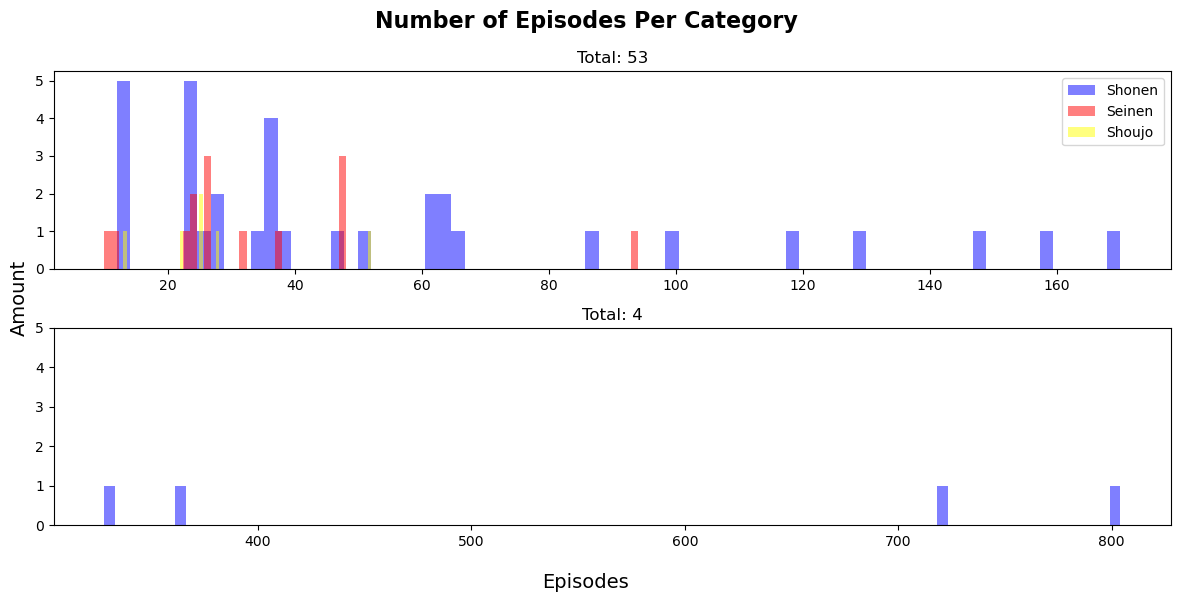

<Figure size 640x480 with 0 Axes>

In [289]:
fig = plt.figure(figsize=(12,6))

#Subplot 1
ax1 = plt.subplot(2,1,1)
ax1.hist(df_shonen['Episodes'], bins=75, color='blue', alpha=0.5, label='Shonen')
ax1.hist(df_seinen['Episodes'], bins=75, color='red', alpha=0.5, label='Seinen')
ax1.hist(df_shoujo['Episodes'], bins=75, color='yellow', alpha=0.5, label='Shoujo')
ax1.set_title('Total: 53')
ax1.legend()

#Subplot 2
ax2 = plt.subplot(2,1,2)
ax2.hist(episodes_filtered_high['Episodes'], bins = 100, color='blue', alpha=0.5)
ax2.set_title('Total: 4')
plt.ylim(0,5)

fig.supxlabel('Episodes', fontsize=14)
fig.supylabel('Amount', fontsize=14)
fig.suptitle('Number of Episodes Per Category', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
plt.clf()

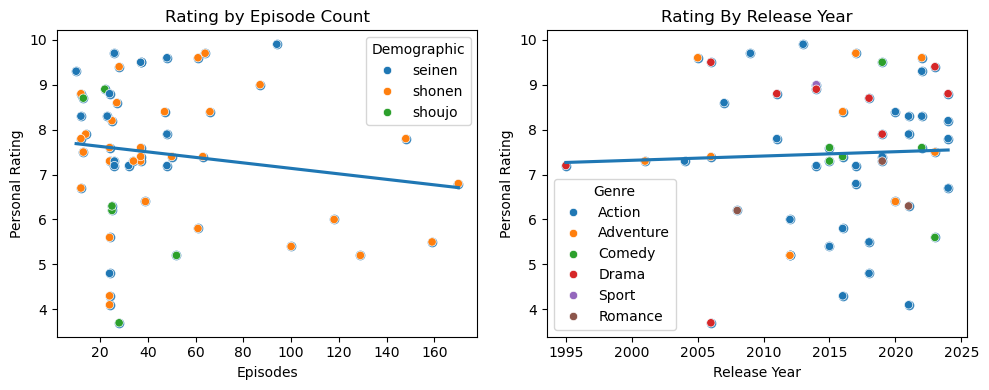

<Figure size 640x480 with 0 Axes>

In [290]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

#Subplot1
sns.regplot(x='Episodes', y='Personal Rating', data=episodes_filtered, ci=None, ax=axes[0])
sns.scatterplot(x='Episodes', y='Personal Rating', data=episodes_filtered, hue='Demographic', ax=axes[0])
axes[0].set_title('Rating by Episode Count')

#Subplot2
sns.regplot(x='Release Year', y='Personal Rating', data=episodes_filtered, ci=None, ax=axes[1])
sns.scatterplot(x='Release Year', y='Personal Rating', data=episodes_filtered, hue='Genre', ax=axes[1])
axes[1].set_title('Rating By Release Year')

plt.tight_layout()
plt.show()
plt.clf()

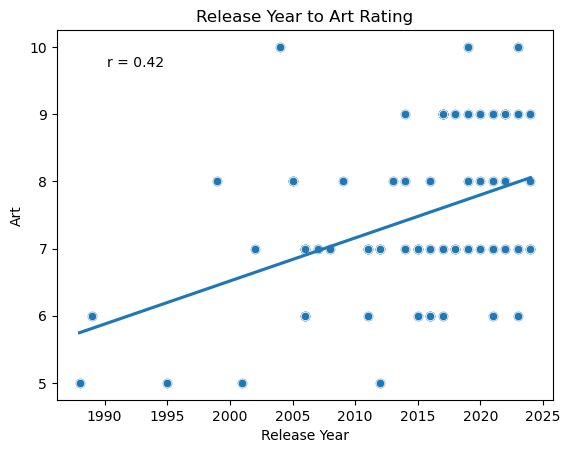

<Figure size 640x480 with 0 Axes>

In [291]:
def scatter_graph(colx, coly, df):
    #Correlation Coefficient
    correlation, p = sp.stats.pearsonr(x=df[colx], y=df[coly])
    #Create Scatterplot
    sns.regplot(x=colx, y=coly, data=df, ci=None)
    sns.scatterplot(x=colx, y=coly, data=df)
    plt.title(str(colx) + ' to ' + str(coly) + ' Rating')
    plt.text(0.1, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes)
    plt.show()
    plt.clf()

scatter_graph('Release Year', 'Art', ratings)

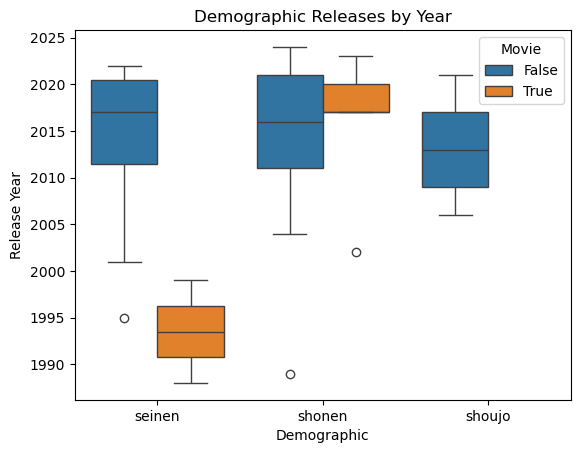

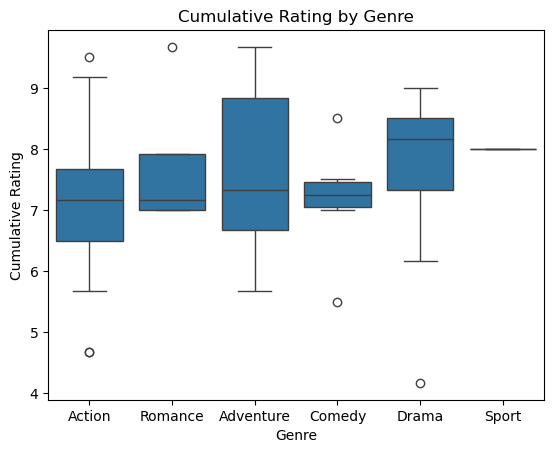

<Figure size 640x480 with 0 Axes>

In [292]:
sns.boxplot(x='Demographic', y='Release Year', hue='Movie', data=ratings)
plt.title('Demographic Releases by Year')
plt.xlabel('Demographic')
plt.ylabel('Release Year')
plt.show()
plt.clf()

sns.boxplot(x='Genre', y='Cumulative Rating', data=ratings)
plt.title('Cumulative Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Cumulative Rating')
plt.show()
plt.clf()

In [293]:
demographic_count = ratings['Demographic'].value_counts()
print(demographic_count)

Demographic
shonen    42
seinen    16
shoujo     6
Name: count, dtype: int64


In [294]:
proportion = demographic_count / len(ratings['Demographic'])
print(proportion)

Demographic
shonen    0.65625
seinen    0.25000
shoujo    0.09375
Name: count, dtype: float64


In [297]:
demographic_labels = ['Shonen','Seinen','Shoujo']
pastel1 = plt.get_cmap('Pastel1')
colors1 = pastel1(np.linspace(0, 1, len(demographic_labels)))

decade_count = ratings['Decade'].value_counts()
decade_proportions = decade_count/len(ratings['Decade'])
decade_labels = ['2010s','2020s','2000s','1900s']

pastel2 = plt.get_cmap('Pastel2')
colors2 = pastel2(np.linspace(0, 1, len(decade_labels)))

explode1 = (0.06, 0.03, 0.03)
explode2 = (0.06, 0.03, 0.03, 0.03)
wedge_properties = {
    'linewidth': 2,
    'edgecolor': 'black',
    'alpha': 0.7
}

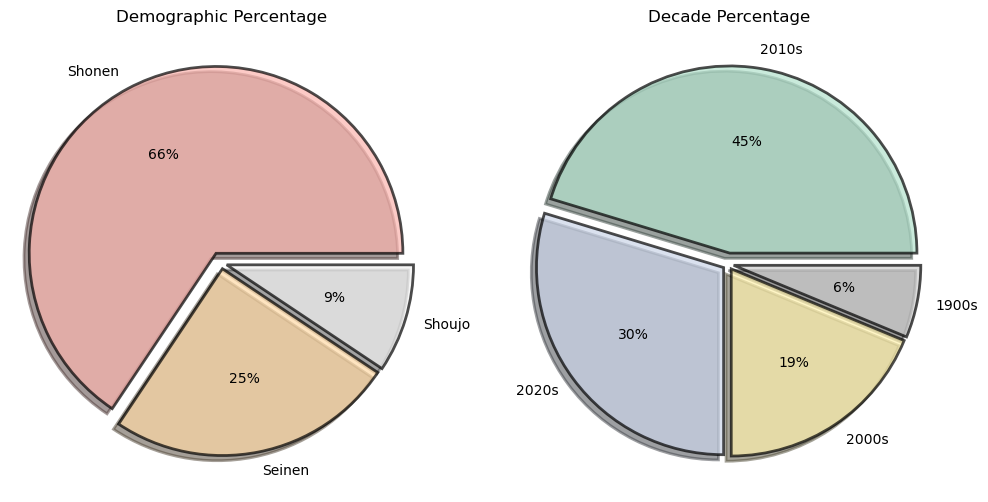

<Figure size 640x480 with 0 Axes>

In [298]:
fig = plt.figure(figsize=(12,6))

#subplot 1
ax1 = plt.subplot(1,2,1)
ax1.pie(proportion, labels=demographic_labels, colors=colors1, autopct='%1.0f%%', shadow=True, explode=explode1, wedgeprops=wedge_properties)
ax1.set_title('Demographic Percentage')
plt.axis('Equal')

#subplot 2
ax2 = plt.subplot(1,2,2)
ax2.pie(decade_proportions, labels=decade_labels, colors=colors2, autopct='%1.0f%%', shadow=True, explode=explode2, wedgeprops=wedge_properties)
ax2.set_title('Decade Percentage')
plt.axis('Equal')

plt.show()
plt.clf()